##### Overview:

Welcome to Day 14. 

Machine Learning (ML) may seem advanced, but you've already learned enough Python basics (Pandas, Numpy, and data visualization) to build your first ML models! 

In fact, you have learned enough to build your first GenAI soltion as well. 

You will first learn:

- Prepare your data for ML by splitting it into training and testing sets and scaling features.
- Build and evaluate a **Linear Regression** model (for predicting continuous values).


#### 1. Linear Regression

Linear Regression is a great starting point—it predicts a continuous value (e.g., house prices, total bill size). Let’s train it using Scikit-Learn!

**Prepping Your Data for ML Models**

Before training any ML model, we need to:

1. **Split the data** into training and testing sets to evaluate model performance.
2. **Scale features** to ensure all numerical data is on a similar range for better performance.

- Example Task: Predict "Fare" from Passenger Classes


In [ ]:
#!pip3 install scikit-learn



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



To start:

In [3]:
# Load the titanic dataset
df = pd.read_csv("../data/titanic_dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Select features and target variable

X = df[["Pclass", "Age", "SibSp", "Parch"]] # Features
y = df["Fare"] # Target

# Handle missing values
X["Age"] = X["Age"].fillna(X["Age"].median())  # Fill missing Age with median


# Split Data into Training and Testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\Satish Singh\AppData\Local\Temp\ipykernel_23820\2930639379.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Age"] = X["Age"].fillna(X["Age"].median())  # Fill missing Age with median


**Training and Testing your ML Model**

In [5]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)



In [6]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Squared Error (MSE): 946.3355043476646
Root Mean Squared Error (RMSE): 30.76256660858558
R² Score: 0.3884468201561929


In [7]:
y_pred[:10]  # Display first 10 predictions

array([17.90413163, 37.06937345,  2.68578224, 51.95920148,  8.83779702,
       73.84209017,  1.49121949, 13.79524905,  3.28306362, 97.20097142])

In [8]:
# Compare actual vs predicted
comparison_df = pd.DataFrame({
    "Actual Fare": y_test.values,
    "Predicted Fare": y_pred
})
comparison_df.head(10)  # Display first 10 rows of comparison

,Actual Fare,Predicted Fare
0,15.2458,17.904132
1,10.5000,37.069373
2,7.9250,2.685782
3,33.0000,51.959201
4,11.2417,8.837797
5,78.8500,73.842090
6,7.7500,1.491219
7,18.0000,13.795249
8,7.7500,3.283064
9,26.2833,97.200971


----
#### Quick Exercises
NONE


---- 


### Day 13 Exercise Solution

1. Scatter Plot:

    - Use the `tips` dataset to create a scatter plot showing the relationship between `total_bill` and `tip`.

    - Add `hue` based on the `sex` column, customize colors, and increase marker size.


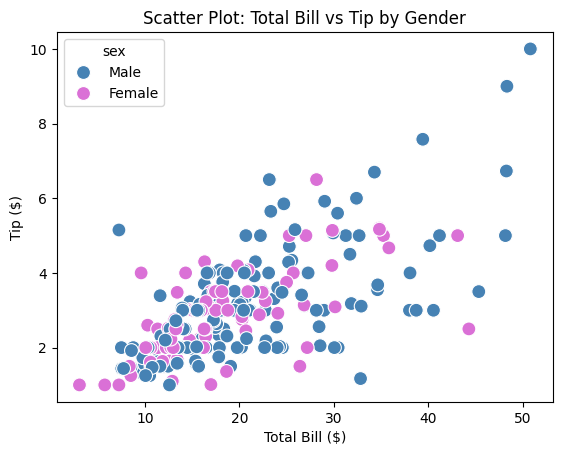

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create scatter plot
sns.scatterplot(
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex",
    palette={"Male": "steelblue", "Female": "orchid"},
    s=100  # Marker size
)

# Add title and labels
plt.title("Scatter Plot: Total Bill vs Tip by Gender")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")

# Show the plot
plt.show()

2. Bar Plot:

    - Create a bar plot showing the average `total_bill` for each `day`, split by `sex`.

    - Use a color palette of your choice.

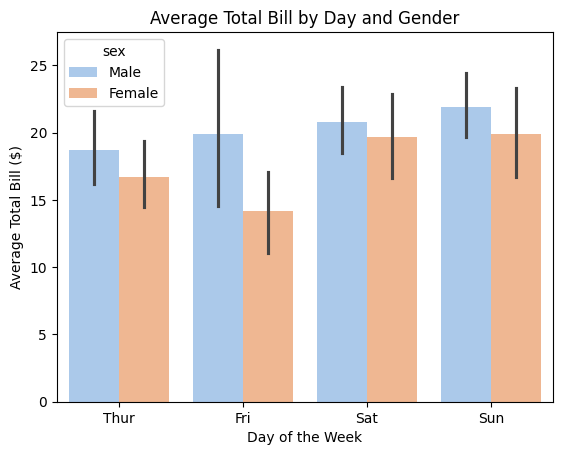

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset
tips = sns.load_dataset("tips")

# Create the bar plot
sns.barplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="sex",
    palette="pastel"  # You can change this to any seaborn-supported palette
)

# Add title and labels
plt.title("Average Total Bill by Day and Gender")
plt.xlabel("Day of the Week")
plt.ylabel("Average Total Bill ($)")

# Show the plot
plt.show()


3. Box and Violin Plots:

    - Compare the `total_bill` distributions for each `day` using a boxplot and violinplot.

    - Include the `hue` parameter to separate by smoker.

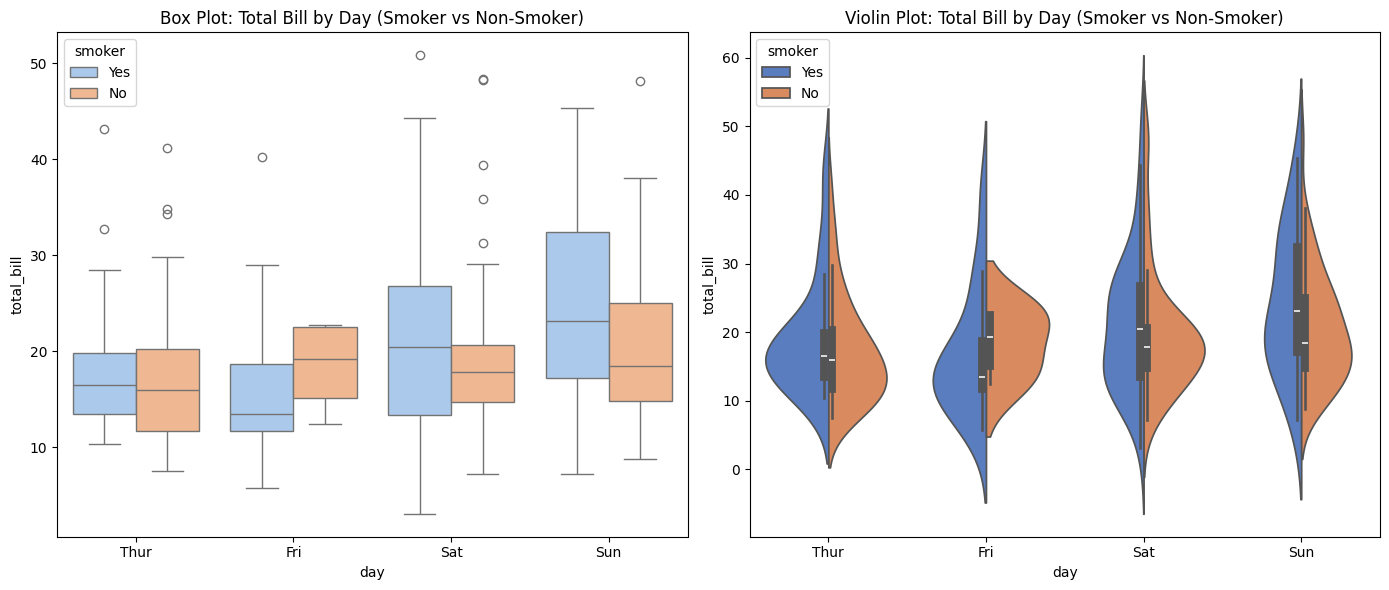

In [11]:
# Set the figure size
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker", palette="pastel")
plt.title("Box Plot: Total Bill by Day (Smoker vs Non-Smoker)")

# Violinplot
plt.subplot(1, 2, 2)
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker", split=True, palette="muted")
plt.title("Violin Plot: Total Bill by Day (Smoker vs Non-Smoker)")

# Display the plots
plt.tight_layout()
plt.show()


4. Heatmap:

    - Compute the correlation matrix of the `tips` dataset and create a heatmap with labels and a `coolwarm` palette.

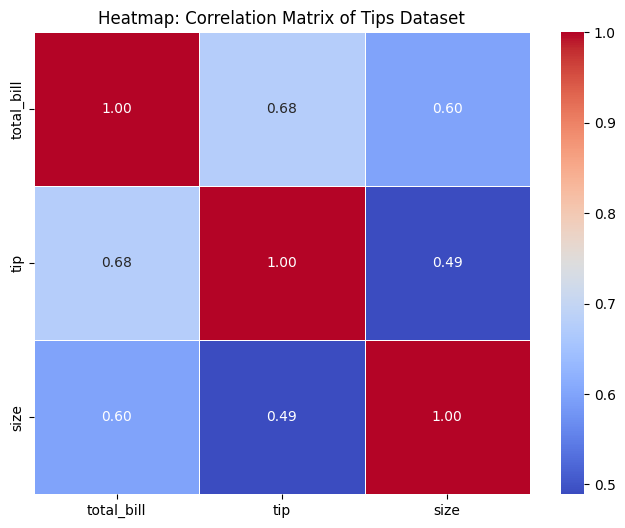

In [12]:
# Compute the correlation matrix (only numerical columns are considered)
corr = tips.corr(numeric_only=True)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap: Correlation Matrix of Tips Dataset")
plt.show()

5. Pairplot:

    - Use pairplot to display pairwise relationships between all numerical variables in the `tips` dataset. Differentiate by the `sex` column.


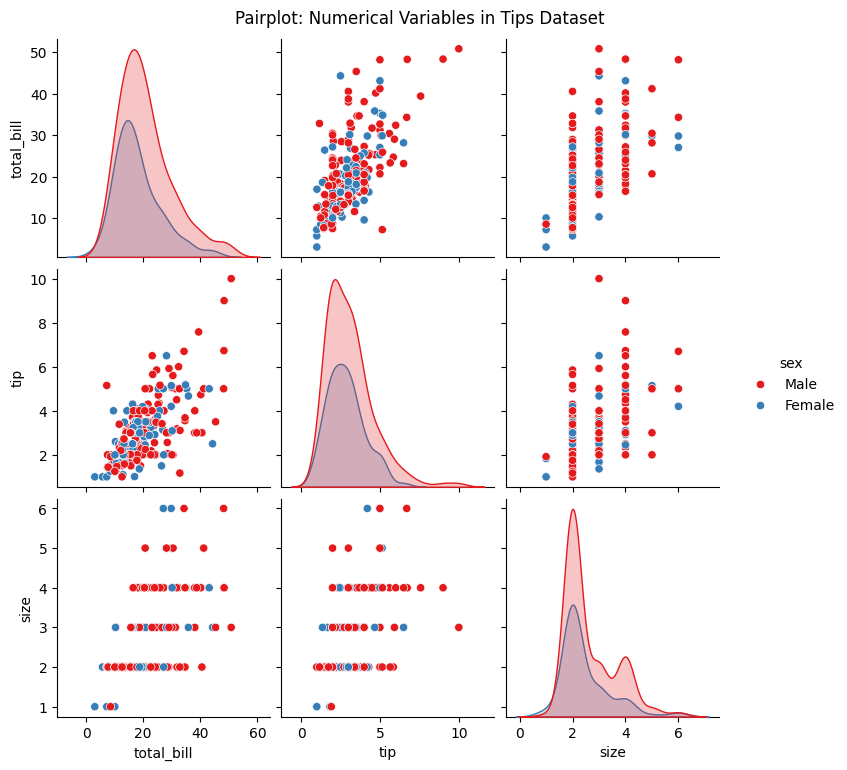

In [13]:
# Create a pairplot of all numerical features, colored by 'sex'
sns.pairplot(tips, hue="sex", palette="Set1")
plt.suptitle("Pairplot: Numerical Variables in Tips Dataset", y=1.02)
plt.show()


# HAPPY LEARNING